https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as nm  
import matplotlib.pyplot as mtp  

  

In [13]:
col_names = ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [14]:
data = pd.read_csv('/content/drive/MyDrive/AI and ML Books/AI and ML code/KNN/User_Data.csv', header=None, names=col_names)

In [15]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,User ID,Gender,Age,EstimatedSalary,Purchased
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0


In [19]:

#importing datasets  
  
  
#Extracting Independent and dependent Variable  
X= data.iloc[1:, [2,3]].values  
y= data.iloc[1:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
  


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [21]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [22]:
y_pred= classifier.predict(x_test)  

In [27]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)  

TypeError: ignored

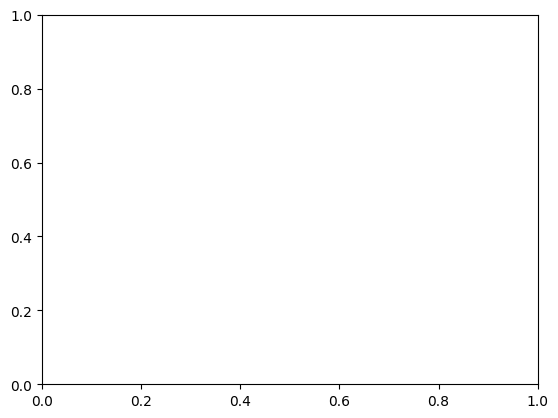

In [28]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show() 